# CDFS SWIRE master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
91cdb7b (Fri Oct 20 11:48:11 2017 +0100)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = os.environ.get('SUFFIX', time.strftime("_%Y%m%d"))
#SUFFIX = "_20170718"

master_catalogue = Table.read("{}/master_catalogue_cdfs-swire{}.fits".format(OUT_DIR, SUFFIX))
print('Using masterlist ' + "{}/master_catalogue_cdfs-swire{}.fits".format(OUT_DIR, SUFFIX))

Using masterlist ./data/master_catalogue_cdfs-swire_20171026.fits


## I - Summary of wavelength domains

In [4]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


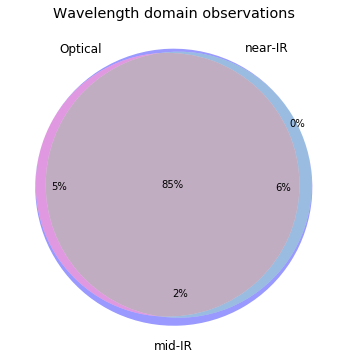

In [5]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('Optical', 'near-IR', 'mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

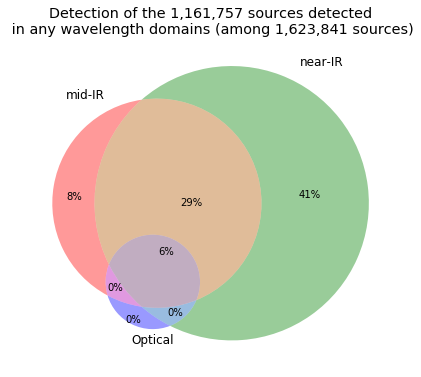

In [6]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [7]:
u_bands = ["OmegaCAM u", "WFI u"]
g_bands = ["OmegaCAM g",          "GPC1 g"]
r_bands = ["OmegaCAM r", "WFI r", "GPC1 r"]
i_bands = ["OmegaCAM i", "WFI i", "GPC1 i"]
z_bands = ["OmegaCAM z",          "GPC1 z", "VISTA z"]
y_bands = [                       "GPC1 y", "VISTA y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

HELP warning: the column m_wfi_u (WFI u) is empty.


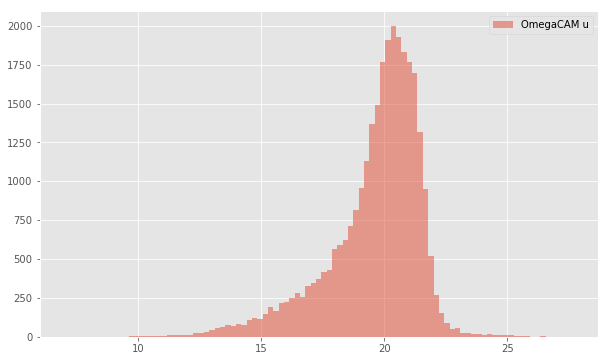

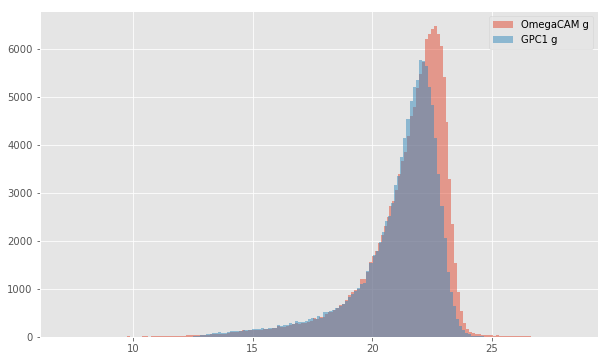

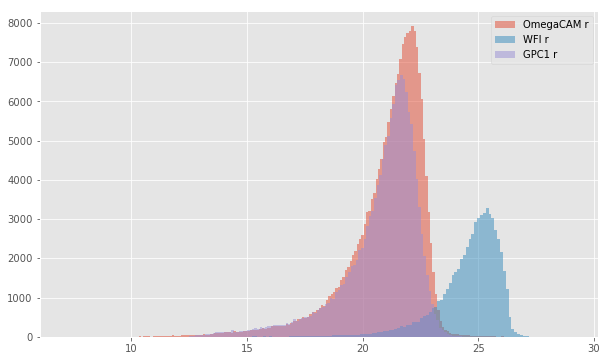

HELP warning: the column m_wfi_i (WFI i) is empty.


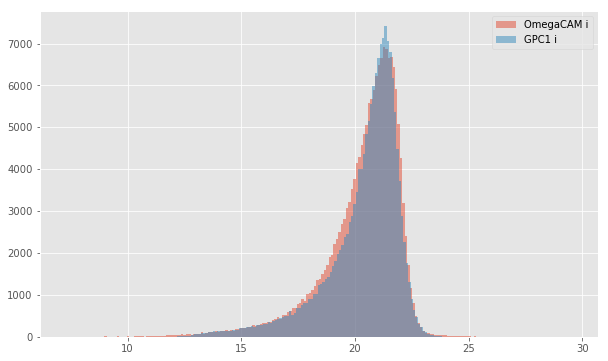

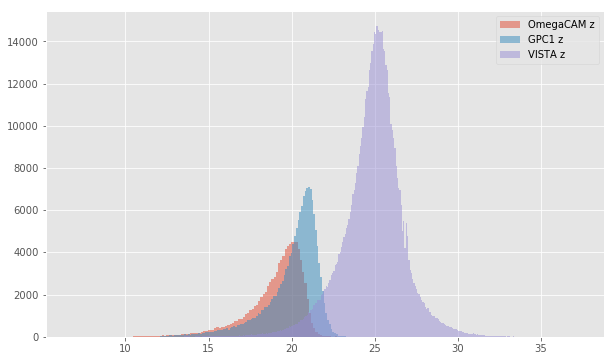

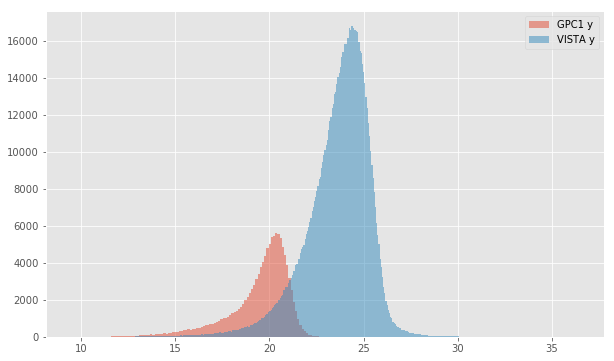

In [8]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

WFI u (aperture) - OmegaCAM u (aperture):
- Median: 0.30
- Median Absolute Deviation: 0.07
- 1% percentile: 0.026031494140625
- 99% percentile: 5.898116226196289


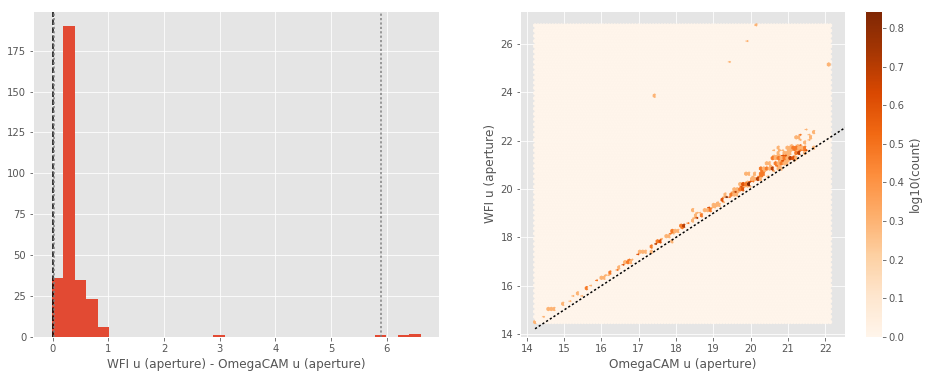

No sources have both OmegaCAM u (total) and WFI u (total) values.
GPC1 g (aperture) - OmegaCAM g (aperture):
- Median: -0.30
- Median Absolute Deviation: 0.27
- 1% percentile: -1.477933654785156
- 99% percentile: 1.4628313636779788


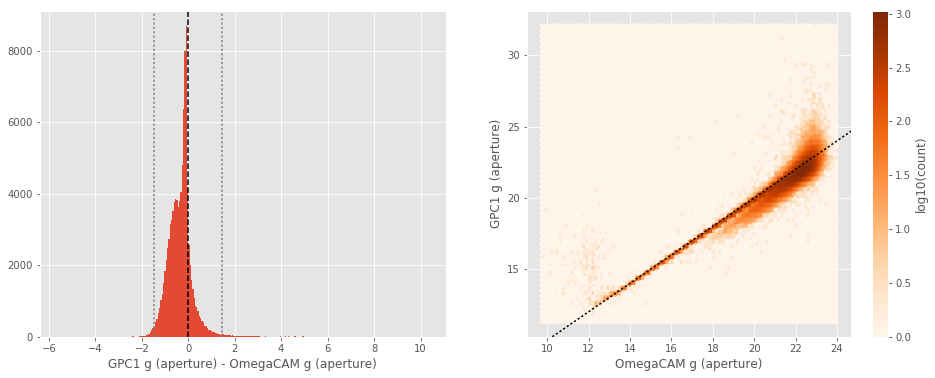

GPC1 g (total) - OmegaCAM g (total):
- Median: -0.07
- Median Absolute Deviation: 0.16
- 1% percentile: -1.296688632965088
- 99% percentile: 0.7950097846984904


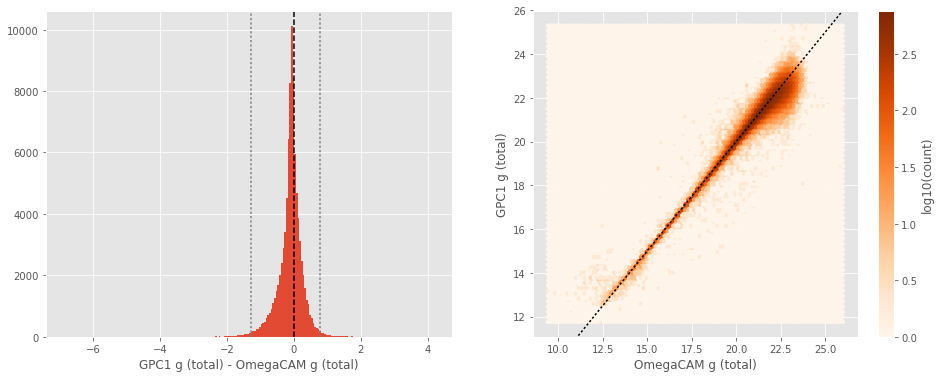

WFI r (aperture) - OmegaCAM r (aperture):
- Median: 0.10
- Median Absolute Deviation: 0.13
- 1% percentile: -0.3106356048583985
- 99% percentile: 0.7375316619873049


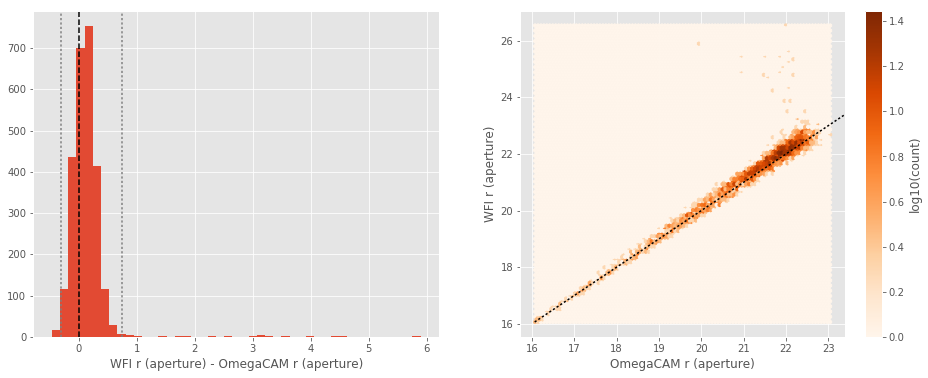

WFI r (total) - OmegaCAM r (total):
- Median: -0.25
- Median Absolute Deviation: 0.15
- 1% percentile: -1.2209947586059569
- 99% percentile: 0.9199421310424809


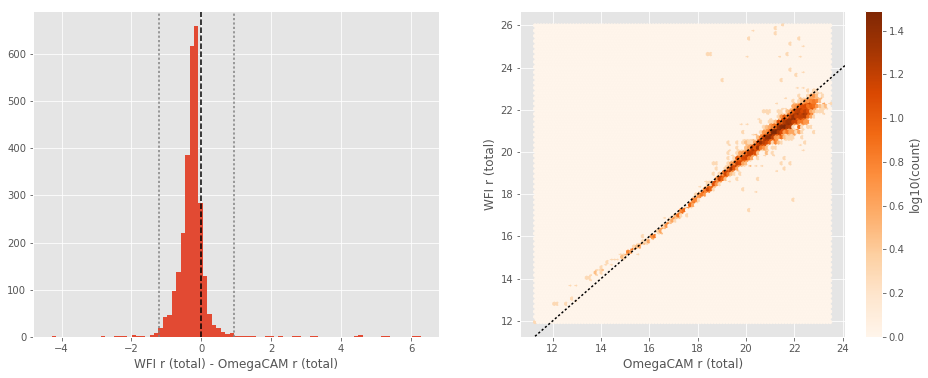

GPC1 r (aperture) - OmegaCAM r (aperture):
- Median: -0.16
- Median Absolute Deviation: 0.22
- 1% percentile: -1.072125778198242
- 99% percentile: 1.2293571472167972


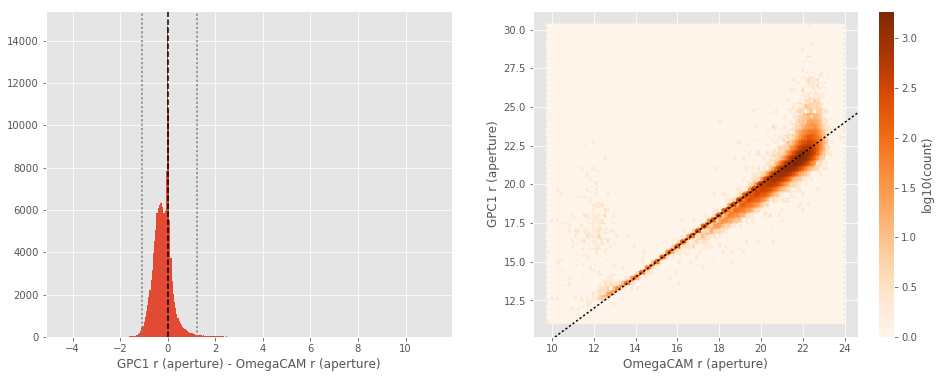

GPC1 r (total) - OmegaCAM r (total):
- Median: 0.08
- Median Absolute Deviation: 0.14
- 1% percentile: -0.922282371520996
- 99% percentile: 1.0283002471923828


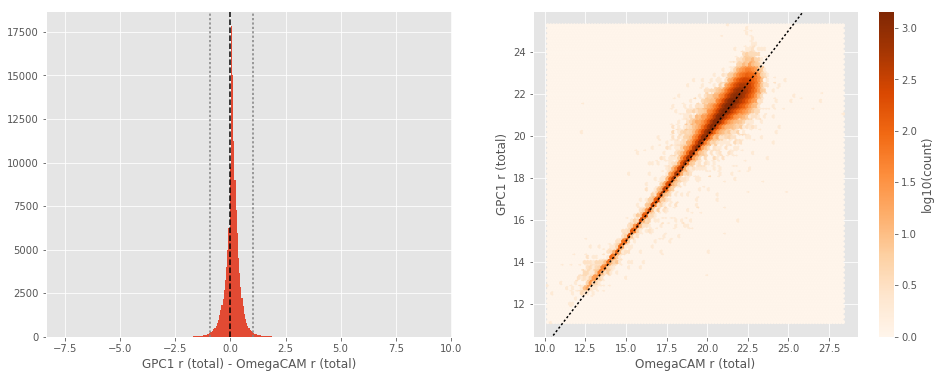

GPC1 r (aperture) - WFI r (aperture):
- Median: -0.25
- Median Absolute Deviation: 0.34
- 1% percentile: -1.379720687866211
- 99% percentile: 1.7204780578613306


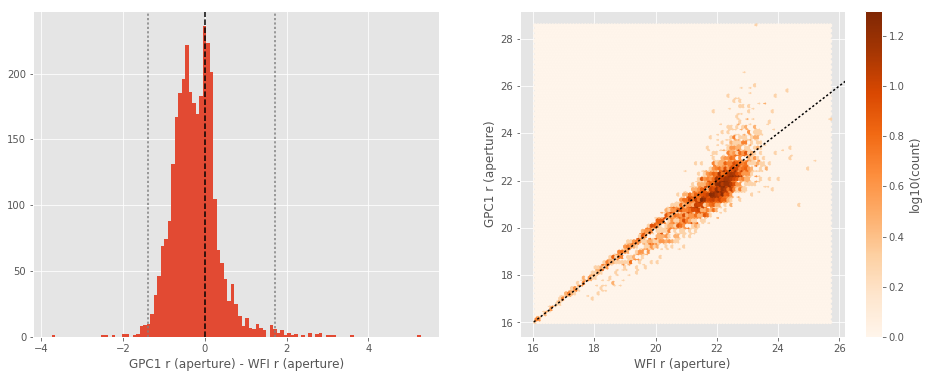

GPC1 r (total) - WFI r (total):
- Median: 0.34
- Median Absolute Deviation: 0.14
- 1% percentile: -0.486072883605957
- 99% percentile: 1.257844467163085


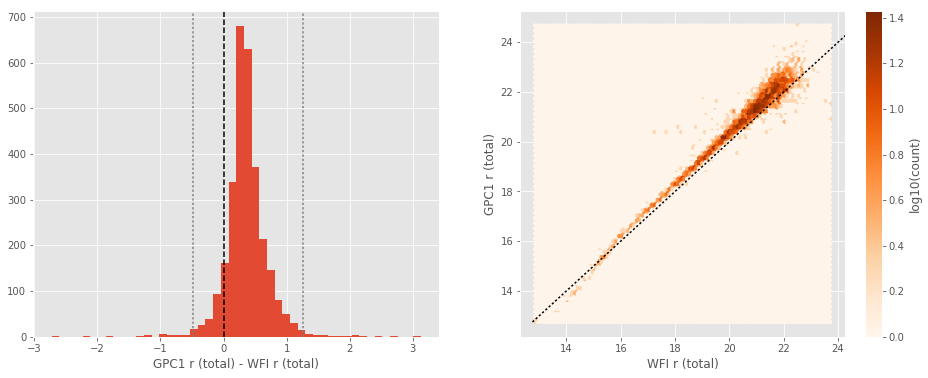

WFI i (aperture) - OmegaCAM i (aperture):
- Median: -0.00
- Median Absolute Deviation: 0.16
- 1% percentile: -0.7342316436767578
- 99% percentile: 0.5792187499999985


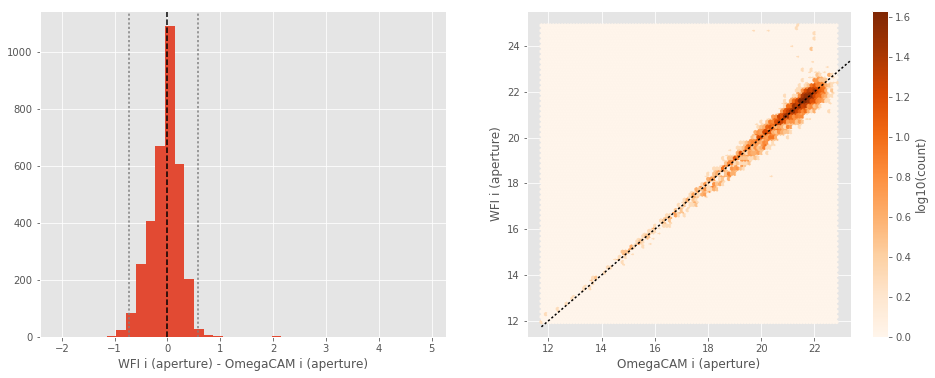

No sources have both OmegaCAM i (total) and WFI i (total) values.
GPC1 i (aperture) - OmegaCAM i (aperture):
- Median: -0.17
- Median Absolute Deviation: 0.19
- 1% percentile: -0.9848984146118165
- 99% percentile: 0.6653031349182128


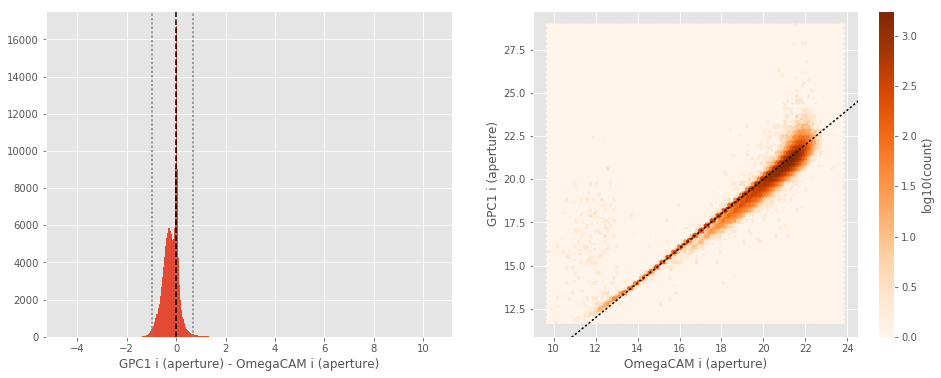

GPC1 i (total) - OmegaCAM i (total):
- Median: 0.05
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8688420867919922
- 99% percentile: 0.8083547973632813


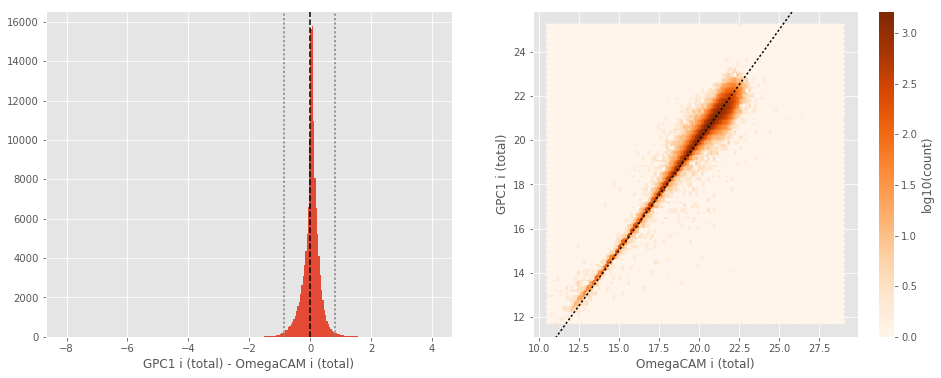

GPC1 i (aperture) - WFI i (aperture):
- Median: -0.15
- Median Absolute Deviation: 0.32
- 1% percentile: -1.2702113151550294
- 99% percentile: 1.1307513236999518


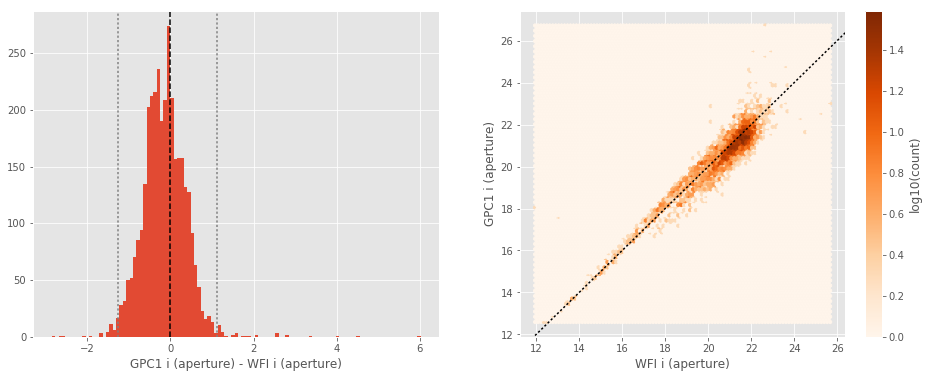

No sources have both WFI i (total) and GPC1 i (total) values.
GPC1 z (aperture) - OmegaCAM z (aperture):
- Median: 0.05
- Median Absolute Deviation: 0.14
- 1% percentile: -0.806519775390625
- 99% percentile: 0.6441340255737295


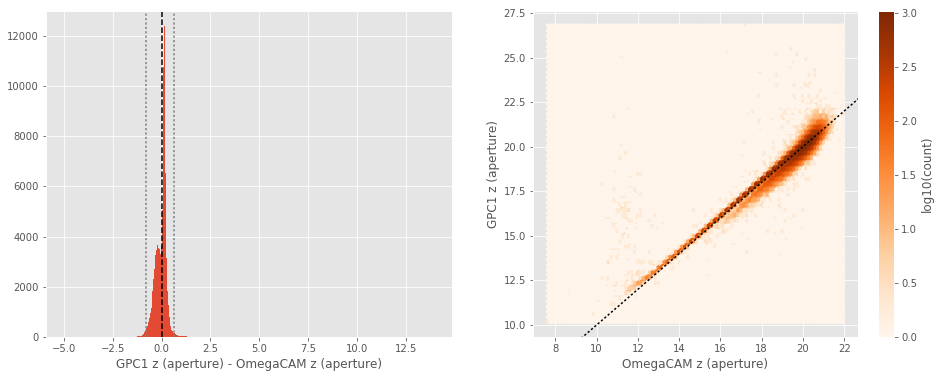

GPC1 z (total) - OmegaCAM z (total):
- Median: 0.17
- Median Absolute Deviation: 0.11
- 1% percentile: -0.6282771301269532
- 99% percentile: 0.7950209236145019


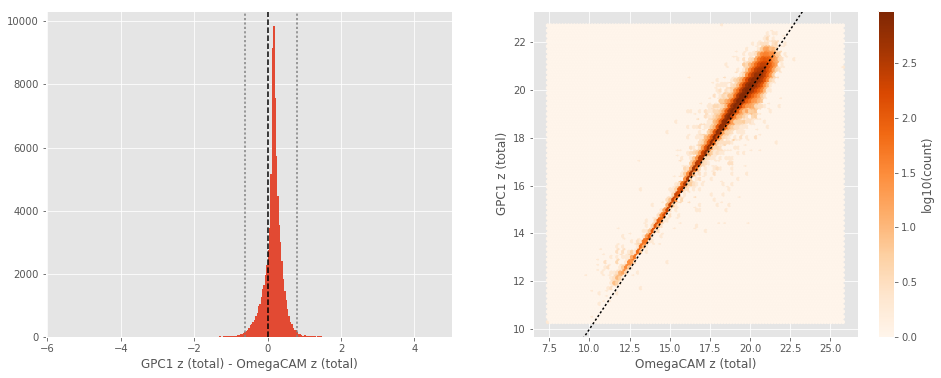

VISTA z (aperture) - OmegaCAM z (aperture):
- Median: 0.50
- Median Absolute Deviation: 0.73
- 1% percentile: -0.2709376907348633
- 99% percentile: 12.429560050964346


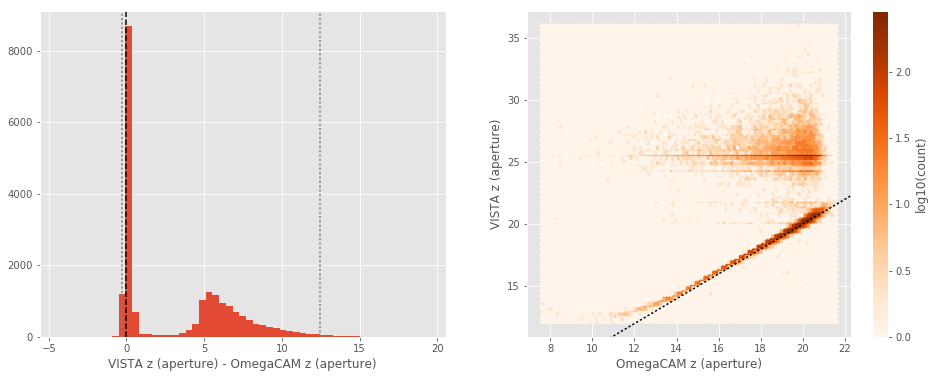

VISTA z (total) - OmegaCAM z (total):
- Median: 0.52
- Median Absolute Deviation: 1.01
- 1% percentile: -0.6812592697143555
- 99% percentile: 11.097147111892701


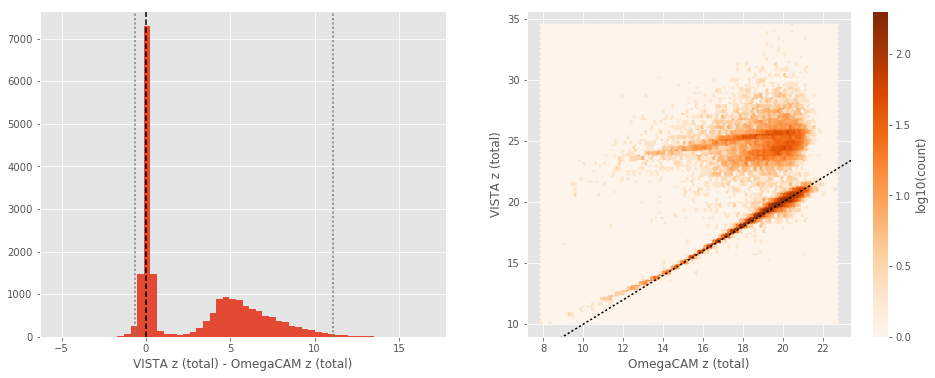

VISTA z (aperture) - GPC1 z (aperture):
- Median: 0.59
- Median Absolute Deviation: 0.98
- 1% percentile: -0.6113994598388672
- 99% percentile: 11.163415861129799


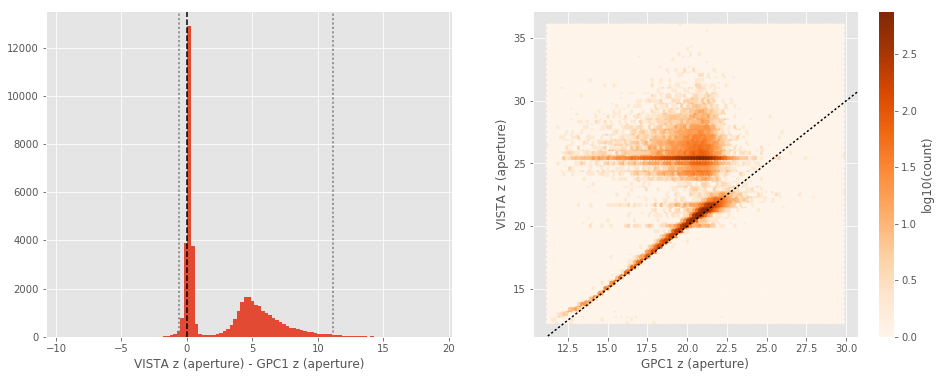

VISTA z (total) - GPC1 z (total):
- Median: 0.33
- Median Absolute Deviation: 0.89
- 1% percentile: -0.710344009399414
- 99% percentile: 9.98784364700317


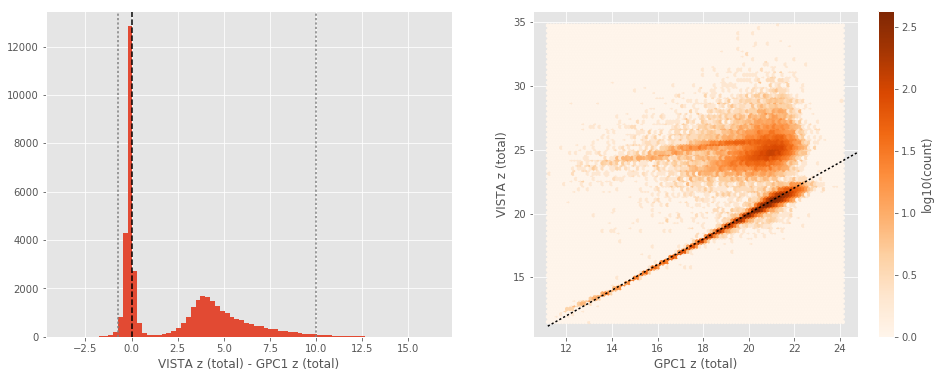

VISTA y (aperture) - GPC1 y (aperture):
- Median: 0.11
- Median Absolute Deviation: 0.16
- 1% percentile: -1.9366253662109376
- 99% percentile: 1.0891255950927738


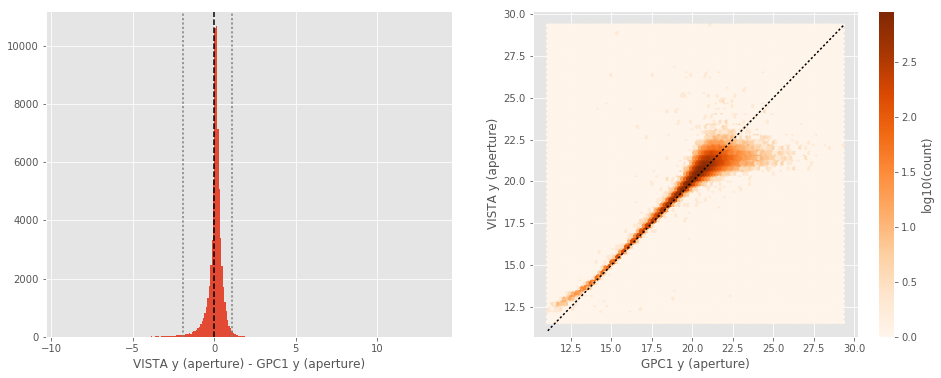

VISTA y (total) - GPC1 y (total):
- Median: -0.17
- Median Absolute Deviation: 0.15
- 1% percentile: -1.011031894683838
- 99% percentile: 0.749658012390137


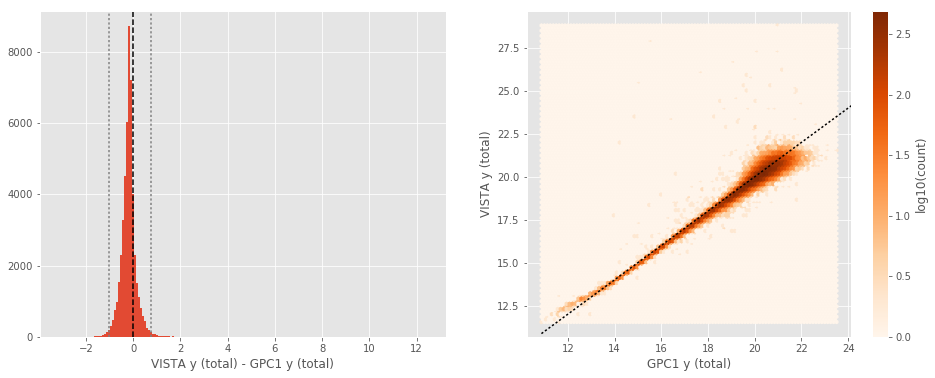

In [9]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to 2MASS to compare magnitudes.

In [10]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In [11]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [12]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_CDFS-SWIRE.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

VISTA J (total) - 2MASS J:
- Median: 0.04
- Median Absolute Deviation: 0.06
- 1% percentile: -1.180109647817785
- 99% percentile: 1.0860372573183226


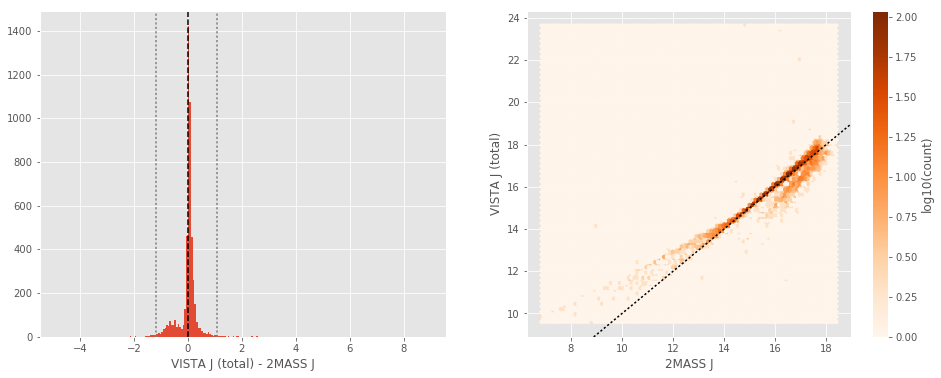

In [13]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_vista_j'][ml_twomass_idx],
                labels=("2MASS J", "VISTA J (total)"))

VISTA Ks (total) - 2MASS Ks:
- Median: 0.04
- Median Absolute Deviation: 0.11
- 1% percentile: -1.1074270935686628
- 99% percentile: 1.3012498481122439


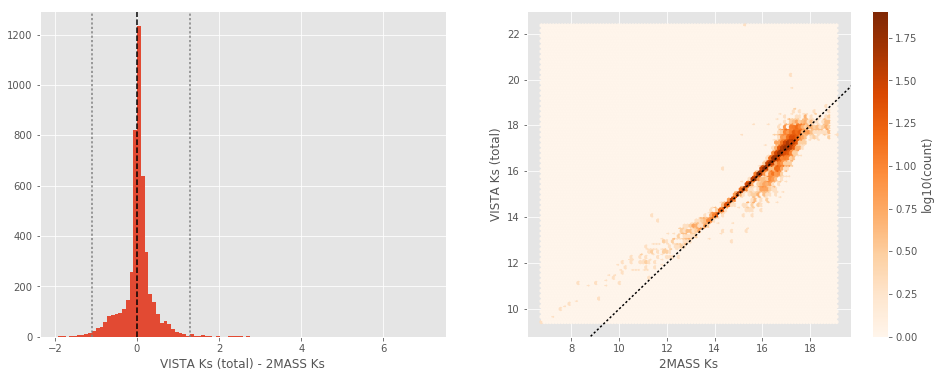

In [14]:
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, master_catalogue['m_vista_ks'][ml_twomass_idx],
                labels=("2MASS Ks", "VISTA Ks (total)"))

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 146445 / 1623841 (9.02%)


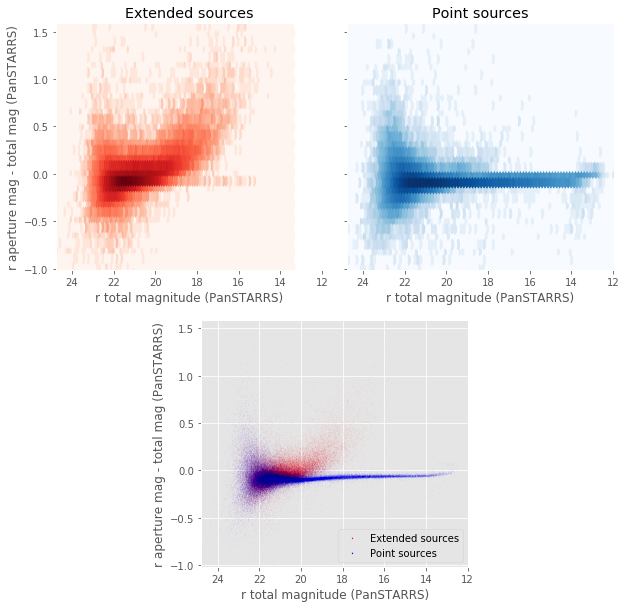

In [15]:
nb_ccplots(
    master_catalogue['m_gpc1_r'],
    master_catalogue['m_ap_gpc1_r'] - master_catalogue['m_gpc1_r'],
    "r total magnitude (PanSTARRS)", "r aperture mag - total mag (PanSTARRS)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 63056 / 1623841 (3.88%)


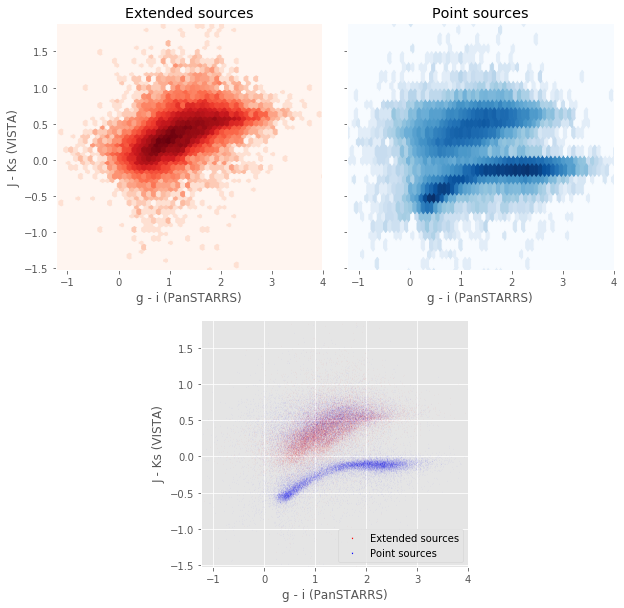

In [16]:
nb_ccplots(
    master_catalogue['m_gpc1_g'] - master_catalogue['m_gpc1_i'],
    master_catalogue['m_vista_j'] - master_catalogue['m_vista_ks'],
    "g - i (PanSTARRS)", "J - Ks (VISTA)",
    master_catalogue["stellarity"]
)

Number of source used: 64744 / 1623841 (3.99%)


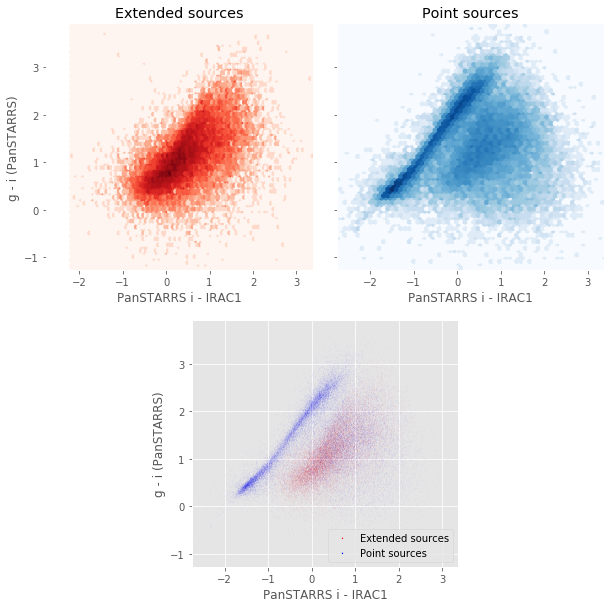

In [17]:
nb_ccplots(
    master_catalogue['m_gpc1_i'] - master_catalogue['m_irac_i1'],
    master_catalogue['m_gpc1_g'] - master_catalogue['m_gpc1_i'],
    "PanSTARRS i - IRAC1", "g - i (PanSTARRS)",
    master_catalogue["stellarity"]
)

Number of source used: 18258 / 1623841 (1.12%)


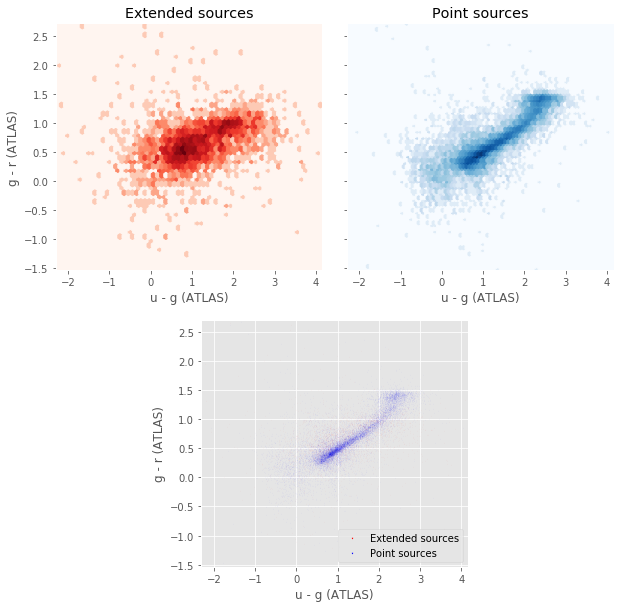

In [18]:
nb_ccplots(
    master_catalogue['m_omegacam_u'] - master_catalogue['m_omegacam_g'],
    master_catalogue['m_omegacam_g'] - master_catalogue['m_omegacam_r'],
    "u - g (ATLAS)", "g - r (ATLAS)",
    master_catalogue["stellarity"]
)

Number of source used: 64054 / 1623841 (3.94%)


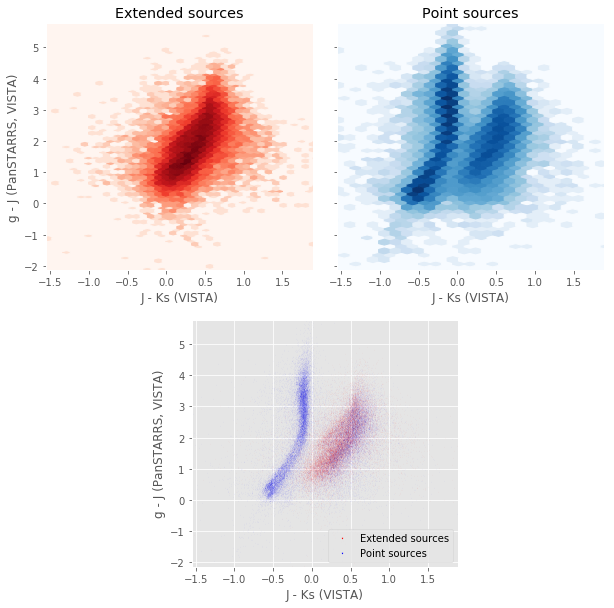

In [19]:
nb_ccplots(
    master_catalogue['m_vista_j'] - master_catalogue['m_vista_ks'],
    master_catalogue['m_gpc1_g'] - master_catalogue['m_vista_j'],
    "J - Ks (VISTA)", "g - J (PanSTARRS, VISTA)",
    master_catalogue["stellarity"]
)

Number of source used: 101165 / 1623841 (6.23%)


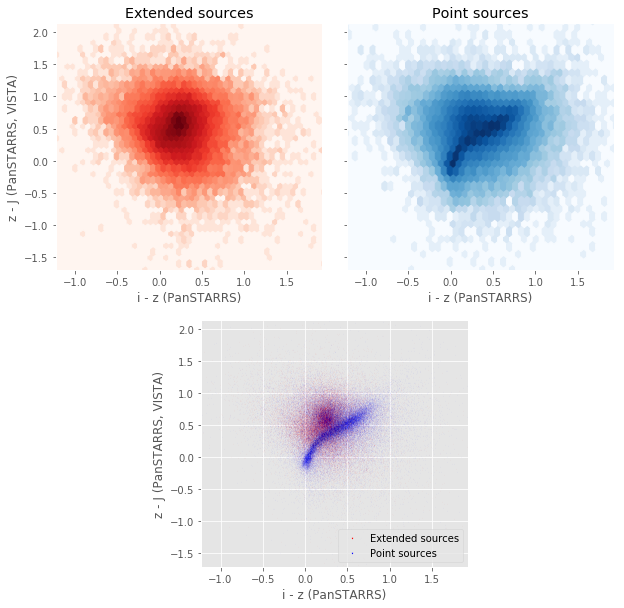

In [20]:
nb_ccplots(
    master_catalogue['m_gpc1_i'] - master_catalogue['m_gpc1_z'],
    master_catalogue['m_gpc1_z'] - master_catalogue['m_vista_j'],
    "i - z (PanSTARRS)", "z - J (PanSTARRS, VISTA)",
    master_catalogue["stellarity"]
)

Number of source used: 28901 / 1623841 (1.78%)


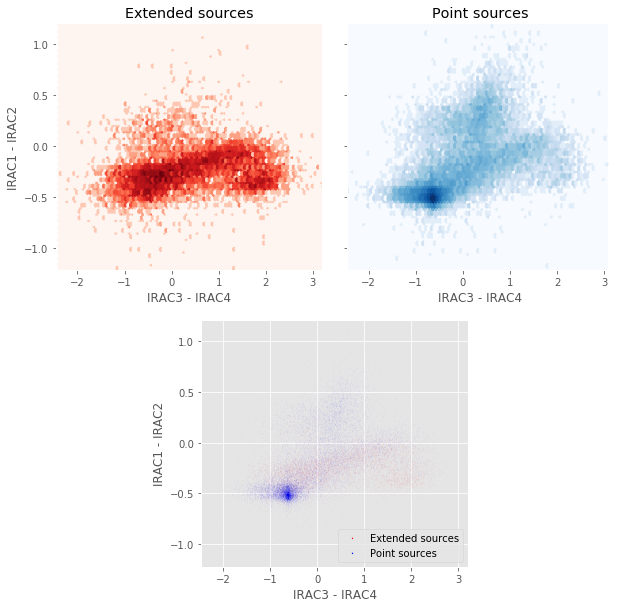

In [21]:
nb_ccplots(
    master_catalogue['m_irac_i3'] - master_catalogue['m_irac_i4'],
    master_catalogue['m_irac_i1'] - master_catalogue['m_irac_i2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)